# The Bristol Project 
## Model fitting
The project is framed as a multivariate regression task (for the moment). Although this may look more like a distribution of distributions which can all regress to the same answer. 

In this notebook the data will be loaded and explored 

In [1]:
import pandas as pd
import os
import historic_data_processing_functions
import logging
import betfairlightweight
from betfairlightweight import StreamListener
import bz2
import random
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)

from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import seaborn as sns 
from scipy import stats
import copy

## Problem 1 - Load the data 
1. Load each data from file 
2. We can use what has already been coded to process (fortunatly - but we will need to do 
    some work to get data on the prices and the volume traded at each price

In [2]:
# jan
month_folder = "/media/x4nno/TOSHIBA EXT/Wanker Tom/Betfair_data/BetFair_data_new_aug_22/historic_data/Jan"
results_folder_path = "/media/x4nno/TOSHIBA EXT/Wanker Tom/Betfair_data/BetFair_data_new_aug_22/horses_jan_wins"
combined_path = "/media/x4nno/TOSHIBA EXT/Wanker Tom/Betfair_data/BetFair_data_new_aug_22/horses_jan_wins_combined_csvs"
bsp_folder = "/media/x4nno/TOSHIBA EXT/Wanker Tom/Betfair_data/BetFair_data_new_aug_22/Jan_bsps"

In [42]:
# feb - obviously choose / change this as needed
month_folder = "/media/x4nno/TOSHIBA EXT/Wanker Tom/Betfair_data/BetFair_data_new_aug_22/historic_data/Feb"
results_folder_path = "/media/x4nno/TOSHIBA EXT/Wanker Tom/Betfair_data/BetFair_data_new_aug_22/horses_feb_wins"
combined_path = "/media/x4nno/TOSHIBA EXT/Wanker Tom/Betfair_data/BetFair_data_new_aug_22/horses_feb_wins_combined_csvs"
bsp_folder = "/media/x4nno/TOSHIBA EXT/Wanker Tom/Betfair_data/BetFair_data_new_aug_22/Feb_bsps"

In [85]:
# march
month_folder = "/media/x4nno/TOSHIBA EXT/Wanker Tom/Betfair_data/BetFair_data_new_aug_22/historic_data/Mar"
results_folder_path = "/media/x4nno/TOSHIBA EXT/Wanker Tom/Betfair_data/BetFair_data_new_aug_22/horses_mar_wins"
combined_path = "/media/x4nno/TOSHIBA EXT/Wanker Tom/Betfair_data/BetFair_data_new_aug_22/horses_mar_wins_combined_csvs"
bsp_folder = "/media/x4nno/TOSHIBA EXT/Wanker Tom/Betfair_data/BetFair_data_new_aug_22/Mar_bsps"

In [ ]:
# may 22
month_folder = "/media/x4nno/TOSHIBA EXT/Wanker Tom/Betfair_data/BetFair_data_new_aug_22/historic_data/May"
results_folder_path = "/media/x4nno/TOSHIBA EXT/Wanker Tom/Betfair_data/BetFair_data_new_aug_22/horses_may_wins"
combined_path = "/media/x4nno/TOSHIBA EXT/Wanker Tom/Betfair_data/BetFair_data_new_aug_22/horses_may_wins_combined_csvs"
bsp_folder = "/media/x4nno/TOSHIBA EXT/Wanker Tom/Betfair_data/BetFair_data_new_aug_22/may_22_bsps"

In [ ]:
# june 22
month_folder = "/media/x4nno/TOSHIBA EXT/Wanker Tom/Betfair_data/BetFair_data_new_aug_22/historic_data/Jun"
results_folder_path = "/media/x4nno/TOSHIBA EXT/Wanker Tom/Betfair_data/BetFair_data_new_aug_22/horses_june_wins"
combined_path = "/media/x4nno/TOSHIBA EXT/Wanker Tom/Betfair_data/BetFair_data_new_aug_22/horses_june_wins_combined_csvs"
bsp_folder = "/media/x4nno/TOSHIBA EXT/Wanker Tom/Betfair_data/BetFair_data_new_aug_22/june_22_bsps"

In [35]:
# july 22
month_folder = "/media/x4nno/TOSHIBA EXT/Wanker Tom/Betfair_data/BetFair_data_new_aug_22/historic_data/Jul"
results_folder_path = "/media/x4nno/TOSHIBA EXT/Wanker Tom/Betfair_data/BetFair_data_new_aug_22/horses_jul_wins"
combined_path = "/media/x4nno/TOSHIBA EXT/Wanker Tom/Betfair_data/BetFair_data_new_aug_22/horses_jul_wins_combined_csvs"
bsp_folder = "/media/x4nno/TOSHIBA EXT/Wanker Tom/Betfair_data/BetFair_data_new_aug_22/july_22_bsps"

In [36]:
# LOAD THIS AGAIN IF YOU NEED TO
bsp_df = pd.read_csv(bsp_folder+"/bsp_df.csv")

# bsp as label. if bsp > / < mean_300?

mean_300  :  0.016428044020130032
std_300  :  -0.015052048861697436
volume_300  :  0.02583385534432915
mean_450  :  -0.03192037107530002
std_450  :  0.006252955780544085
volume_450  :  0.00035516596680164537
mean_600  :  0.022469933850277797
std_600  :  -0.008803236313677167
volume_600  :  -0.015774633081436
mean_900  :  0.06459601296156997
std_900  :  -0.01706037605819068
volume_900  :  0.014450882085353112
mean_1800  :  -0.0912248988801833
std_1800  :  0.01697884988929477
volume_1800  :  0.005596381181986149
mean_2700  :  0.011292762398340222
std_2700  :  0.018005368854893806
volume_2700  :  0.006630463569163948
mean_3600  :  -0.1536815073646813
std_3600  :  -0.0011004726750455207
volume_3600  :  0.005291051452037874
mean_7200  :  0.1373794725341158
std_7200  :  -0.0011516670962916204
volume_7200  :  -0.010131434531609527
mean_14400  :  0.02985253450205503
std_14400  :  -0.00726370367833204
volume_14400  :  -0.012408813953707798


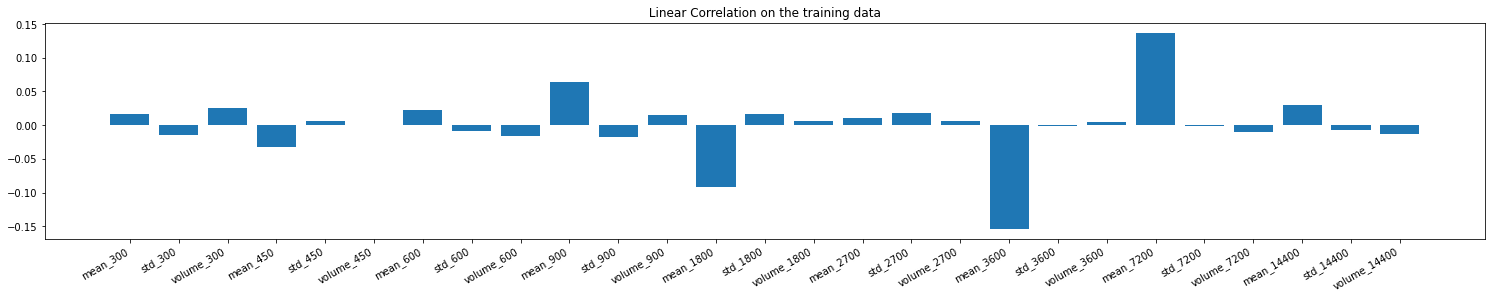

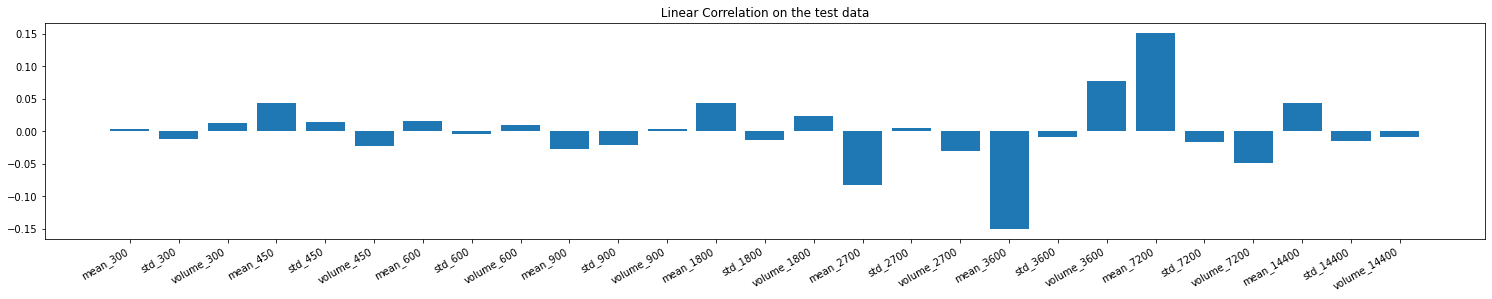

In [37]:
# load in our trains and tests - in this case it learns on jan and feb and mar is the test
# train_df1 = pd.read_csv("jan20_analysis_direct_nr0_100_50.csv")
# train_df2 = pd.read_csv("feb20_analysis_direct_nr0_100_50.csv")
# train_df3 = pd.read_csv("mar20_analysis_direct_nr0_100_50.csv")
train_df4 = pd.read_csv("may22_analysis_direct_nr0_100_50.csv")
train_df5 = pd.read_csv("jun22_analysis_direct_nr0_100_50.csv")

frames = [#train_df1,
#           train_df2,
#           train_df3,
          train_df4,
          train_df5]
train_df = pd.concat(frames)

train_df = train_df.drop(["Unnamed: 0", "selection_ids", "market_id"], axis=1)
train_df = train_df.dropna()
# train_df2 = pd.read_csv("feb_analysis2.csv")
# train_df2 = train_df2.drop(["Unnamed: 0", "selection_ids", "market_id"], axis=1)
# train_df2 = train_df2.dropna()

# frames = [train_df, train_df2]

# train_df = pd.concat(frames) # uncomment this if you want them concatted

train_df = train_df[train_df["mean_300"] < 50]
train_df = train_df[train_df["mean_14400"] > 0]
train_df = train_df.drop(train_df[train_df["std_2700"] > 5].index)


test_df = pd.read_csv("jul22_analysis_direct_nr0_100_50.csv")
test_df = test_df.drop(["Unnamed: 0", "selection_ids", "market_id"], axis=1)
test_df = test_df[test_df["mean_300"] < 50 ]
test_df = test_df[test_df["mean_14400"] > 0 ]
test_df = test_df.dropna()

# below is a slight hack ... 
test_df = test_df.drop(test_df[test_df["std_2700"] > 5].index)


mean_test_900 = copy.deepcopy(test_df["mean_900"].values)
mean_test_300 = copy.deepcopy(test_df["mean_300"].values)

# sort out our targets
bsp_train_df = train_df["bsps"]
mean300_train_df = train_df["mean_300"]
x_train_df = train_df.drop(["bsps"], axis=1)
bsp_test_df = test_df["bsps"]
mean300_test_df = test_df["mean_300"]
x_test_df = test_df.drop(["bsps"], axis=1)

y_train_df = ((mean300_train_df - bsp_train_df)>0).astype(int)
y_test_df = ((mean300_test_df - bsp_test_df)>0).astype(int)

# x_train_df["near_mean_delta"] = x_train_df["mean_900"] - x_train_df["mean_1800"]
# x_train_df["mid_mean_delta"] = x_train_df["mean_900"] - x_train_df["mean_3600"]
# x_train_df["far_mean_delta"] = x_train_df["mean_900"] - x_train_df["mean_7200"]

# x_train_df["near_std_delta"] = x_train_df["std_900"] - x_train_df["std_1800"]
# x_train_df["mid_std_delta"] = x_train_df["std_900"] - x_train_df["std_3600"]
# x_train_df["far_std_delta"] = x_train_df["std_900"] - x_train_df["std_7200"]

# x_test_df["near_mean_delta"] = x_test_df["mean_900"] - x_test_df["mean_1800"]
# x_test_df["mid_mean_delta"] = x_test_df["mean_900"] - x_test_df["mean_3600"]
# x_test_df["far_mean_delta"] = x_test_df["mean_900"] - x_test_df["mean_7200"]

# x_test_df["near_std_delta"] = x_test_df["std_900"] - x_test_df["std_1800"]
# x_test_df["mid_std_delta"] = x_test_df["std_900"] - x_test_df["std_3600"]
# x_test_df["far_std_delta"] = x_test_df["std_900"] - x_test_df["std_7200"]

# apply scaling
scaler = StandardScaler()
clm=x_train_df.columns
x_train_df = pd.DataFrame(scaler.fit_transform(x_train_df), columns=clm)
x_test_df = pd.DataFrame(scaler.transform(x_test_df), columns=clm)

# fit linear regression model (for feature exploration and initial results)
model = LinearRegression()
model.fit(x_train_df, y_train_df)

model_test = LinearRegression()
model_test.fit(x_test_df, y_test_df)

# get feature importance co-effs
importance = model.coef_
importance_test = model_test.coef_

# print the co-effs
coef_count = 0
for column in x_train_df.columns:
    print(column, " : ", importance[coef_count])
    coef_count += 1

# plot these as a bar-chart for clarity for train 

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x_train_df.columns, importance)
plt.xticks(rotation=30, ha='right')
plt.title(" Linear Correlation on the training data ")
plt.show()

# plot these also for test and this should give a good indication
# if the linear model will work (it will)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x_test_df.columns, importance_test)
plt.xticks(rotation=30, ha='right')
plt.title(" Linear Correlation on the test data ")
plt.show()

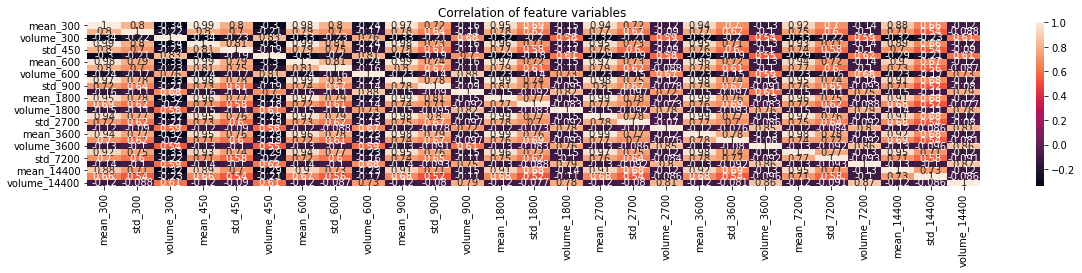

Text(0.5, 1.0, 'Pearson Correlation of features WRT bsps')

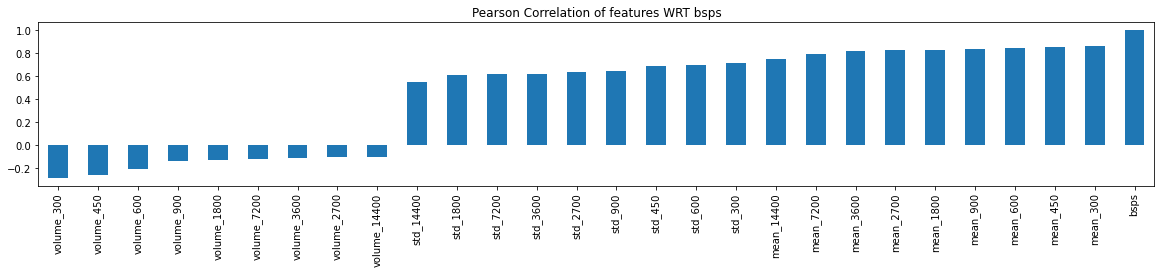

In [38]:
## Correlation of each variable with each other using the pandas .corr function
sns.heatmap(x_train_df.corr(), annot=True)
plt.title("Correlation of feature variables ")
plt.show()
plt.clf()
## Correlation between the target variable (using pearson)
## Note this is basically the same as the below coeffs

df_pearson = train_df.corr(method="pearson")["bsps"]
df_pearson = df_pearson.sort_values()
df_pearson.plot.bar()
plt.title("Pearson Correlation of features WRT bsps")

 
 means of the training set are: 

 bsps              12.387586
mean_300          11.421059
std_300            0.347863
volume_300      3133.180291
mean_450          11.325144
std_450            0.321672
volume_450      1941.021555
mean_600          11.239986
std_600            0.389969
volume_600      2256.848623
mean_900          11.221272
std_900            0.460637
volume_900      2497.845239
mean_1800         11.266801
std_1800           0.315092
volume_1800      768.068616
mean_2700         11.249896
std_2700           0.282404
volume_2700      567.520748
mean_3600         11.161064
std_3600           0.476959
volume_3600     1247.211786
mean_7200         10.952055
std_7200           0.695053
volume_7200     1425.850509
mean_14400        10.543143
std_14400          1.078747
volume_14400    1997.391807
dtype: float64
 
 stds of the training set are: 

 bsps              12.035769
mean_300           9.173621
std_300            0.460035
volume_300      6391.045794
mean_450        

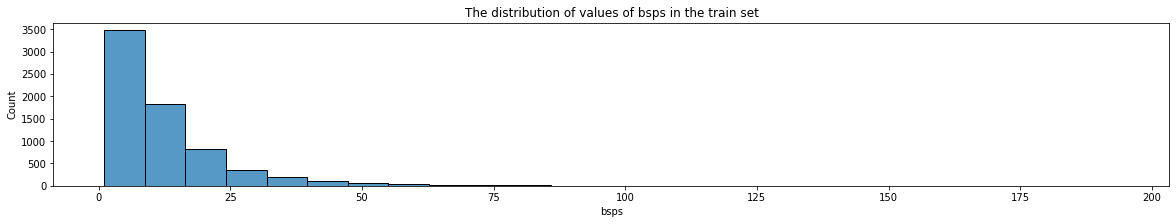

 The mean and std of the heating load are  12.387585774490878 12.035768604783778
 The median of heating load is  8.701208584476262


<Figure size 1440x216 with 0 Axes>

In [39]:
# Lets quickly look at the description of the variable

mean_train = train_df.mean()
print(" \n means of the training set are: \n\n", mean_train)
std_train = train_df.std()
print(" \n stds of the training set are: \n\n", std_train)

# mean_train.plot.bar()
# plt.show()
# plt.clf()

# std_train.plot.bar()
# plt.show()
# plt.clf()
# The graph formed from above is not super informative, lets jsut look at the target

sns.histplot(train_df["bsps"], bins=25)
plt.title("The distribution of values of bsps in the train set")
plt.show()
plt.clf()

print(" The mean and std of the heating load are ", mean_train["bsps"],
         std_train["bsps"])

print(" The median of heating load is ", train_df["bsps"].median())

MAE train :  0.4936708411316183
RMS train :  0.4967680902847384
MAE test :  0.4942556379969169
RMS test :  0.4970782096474656


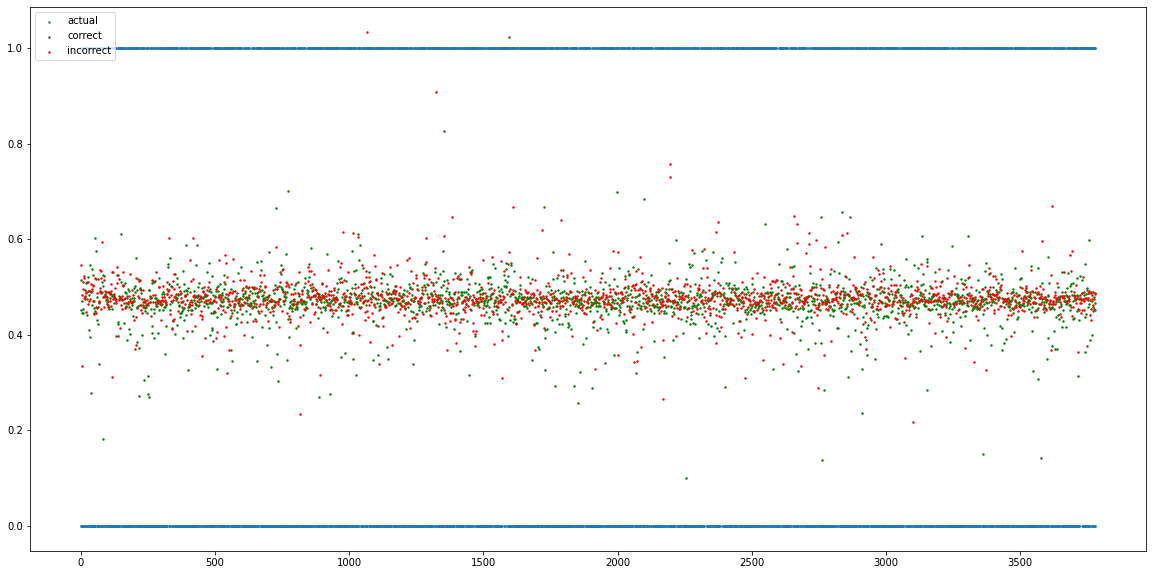

accuracy =  0.542978048135414


In [46]:
## Now demonstrate the linear model predict ability

def rms(y,y_pred):
    rms=np.sqrt(np.mean((y-y_pred)**2))
    return rms

y_pred_train = model.predict(x_train_df)
y_pred_test = model.predict(x_test_df)

results_train_mae = mae(y_train_df, y_pred_train)
results_train_rms = rms(y_train_df, y_pred_train)

results_test_mae = mae(y_test_df, y_pred_test)
results_test_rms = rms(y_test_df, y_pred_test)
print("MAE train : ", results_train_mae)
print("RMS train : ", results_train_rms)
print("MAE test : ", results_test_mae)
print("RMS test : ", results_test_rms)


# lets take a look at the data and the prediction. 
plt.rcParams["figure.figsize"] = (20,10)
x = len(y_pred_test)
y_test_df = y_test_df.reset_index(drop=True)
y_pred_correct = [((y_pred_test[i] < 0.5) & (y_test_df[i] <0.5)) or ((y_pred_test[i] > 0.5) & (y_test_df[i] >0.5)) for i in range(len(y_test_df))]
correct_x = []
correct_y = []
incorrect_x = []
incorrect_y = []
for i in range(x):
    if y_pred_correct[i] == True:
        correct_x.append(i)
        correct_y.append(y_pred_test[i])
    else:
        incorrect_x.append(i)
        incorrect_y.append(y_pred_test[i])
        
plt.scatter(range(x), y_test_df, label="actual", s=2)
plt.scatter(correct_x, correct_y, color="green", label="correct",s=2)
plt.scatter(incorrect_x, incorrect_y, color="red", label="incorrect", s=2)
plt.legend()
plt.show()

print("accuracy = ", (len(correct_x)/(len(correct_x)+len(incorrect_x))))

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

names = [
#     "Nearest Neighbors",
#     "Linear SVM",
#     "RBF SVM",
    "Gaussian Process",
#     "Decision Tree",
#     "Random Forest",
#     "Neural Net",
#     "AdaBoost",
#     "Naive Bayes",
#     "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
     #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

# preprocess dataset, split into training and test part

X_train = x_train_df
X_test = x_test_df
y_train = y_train_df
y_test = y_test_df


# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(name, score)

KeyboardInterrupt: 